## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Import data

In [2]:
data1 = pd.read_csv('occupancy_data/datatraining.txt')
data1.shape

(8143, 7)

In [3]:
data2 = pd.read_csv('occupancy_data/datatest.txt')
data2.shape

(2665, 7)

In [4]:
data3 = pd.read_csv('occupancy_data/datatest2.txt')
data3.shape

(9752, 7)

## Data preparation

In [5]:
data = pd.concat([data1, data2,data3], axis=0, ignore_index=True)
data.shape

(20560, 7)

In [6]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


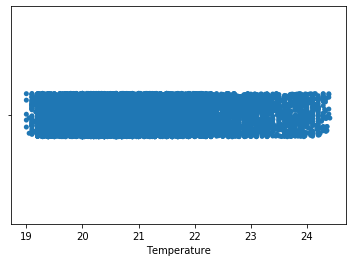

In [8]:
sns.stripplot(x=data["Temperature"]) # no outliers

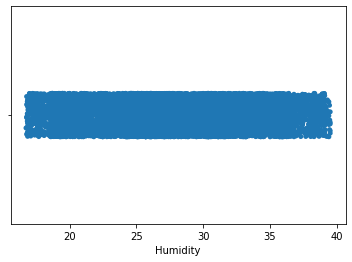

In [9]:
sns.stripplot(x=data["Humidity"]) # no outliers

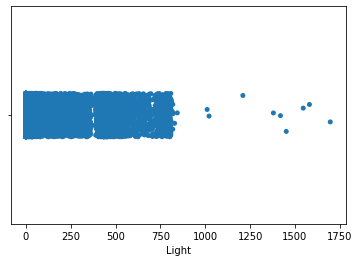

In [10]:
sns.stripplot(x=data["Light"])  # outliers

In [11]:
# drop outliers
data = data.drop(data[data.Light > 900].index)
data.shape

(20551, 7)

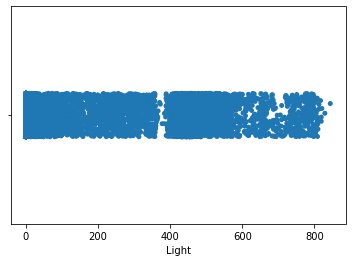

In [12]:
sns.stripplot(x=data["Light"])  # no outliers now

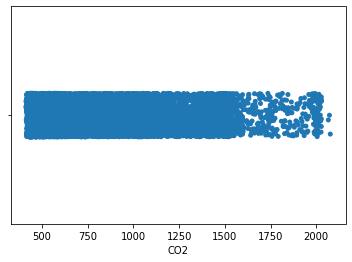

In [13]:
sns.stripplot(x=data["CO2"]) # no outliers

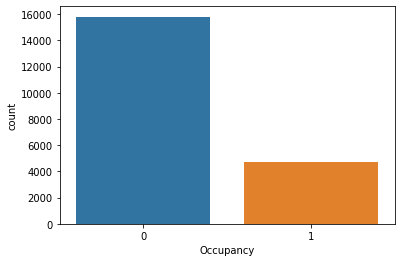

In [14]:
sns.countplot(x='Occupancy',data=data)

In [15]:
np.sum(data['Occupancy']==0),np.sum(data['Occupancy']==1)

(15808, 4743)

In [16]:
np.sum(data['Occupancy'] == 1)/(np.sum(data['Occupancy'] == 0) +
                                np.sum(data['Occupancy'] == 1))  # proportion of Occupancy days

0.23079168896890662

In [17]:
np.sum(data['Occupancy'] == 0)/(np.sum(data['Occupancy'] == 0) +
                                np.sum(data['Occupancy'] == 1))  # proportion of non-Occupancy days

0.7692083110310933

In [18]:
X = data.drop(['date','Occupancy'],axis=1)
y = data['Occupancy']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16440, 5), (4111, 5), (16440,), (4111,))

In [20]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN model

In [21]:
kRange = range(1, 10)
scores = []
for k in kRange:
    knnN = KNeighborsClassifier(n_neighbors=k)
    knnN.fit(X_train, y_train)
    y_predN = knnN.predict(X_test)
    scores.append(accuracy_score(y_test, y_predN))

Text(0, 0.5, 'Testing accuracy')

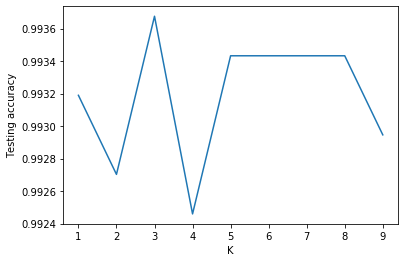

In [22]:
plt.plot(kRange, scores)
plt.xlabel('K')
plt.ylabel('Testing accuracy')
# k=3 is optimal

## Evaluation

In [23]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)
y_predict3 = knn3.predict(X_test)   
print(classification_report(y_test,y_predict3)) 
print(confusion_matrix(y_test,y_predict3))
print(accuracy_score(y_test,y_predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       0.98      0.99      0.99       918

    accuracy                           0.99      4111
   macro avg       0.99      0.99      0.99      4111
weighted avg       0.99      0.99      0.99      4111

[[3178   15]
 [  11  907]]
0.9936755047433714
